# Project: Wrangling and Analyze Data

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_colwidth', -1)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#load twitter archive csv
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
#check the first 5 columns of the data set
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Using request to scrape the image prediction files from the Udacity server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv', 'wb') as file:
    image_predictions_req = requests.get(url)
    file.write(image_predictions_req.content)

#load the images and then use the tweet id as the column index again for continuity
image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')
image_pred.set_index("tweet_id", inplace = True)

#print first 5 rows of data
image_pred.head()


,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API

# tweet_ids = df_twitter_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [5]:
#load the twitter api data from the json file
# For the longest time here i was getting NaN in my favourites column,
# it took me a while to realise but it was because i was spelling it the English way,
# instead of the American way. Useful spot when data wrangling!
with open('tweet-json.txt') as _:
    twitter_api = pd.DataFrame((json.loads(line) for line in _),
                               columns = ['id', 'favorite_count', 'retweet_count'])

In [6]:
# Format the data frame, first step is to change the column names. 
# After that i will set the index of the dataframe as the twitter id,
# similar to the first data gathering section

twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
#twitter_api.set_index('tweet_id', inplace = True)

# Display the first 5 rows of the newly created data frame.
twitter_api.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Assessing df_twitter_archive

In [7]:
# First step is to always check all the dataframes we have. I'll follow the order they were gathered in
# Print the whole dataframe to do some visual assessment
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [8]:
# lets look at the summary of the first data frame
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#check for duplicates
sum(df_twitter_archive['tweet_id'].duplicated())

0

In [10]:
#check for unique and non-unique tweet ids
df_twitter_archive['tweet_id'].is_unique

True

In [11]:
#following from the cell above
df_twitter_archive['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [12]:
#lets check the dog names
df_twitter_archive['name'].value_counts()

None          745
a             55 
Charlie       12 
Oliver        11 
Cooper        11 
Lucy          11 
Lola          10 
Tucker        10 
Penny         10 
Winston       9  
Bo            9  
the           8  
Sadie         8  
Bailey        7  
Buddy         7  
Daisy         7  
an            7  
Toby          7  
Scout         6  
Bella         6  
Jax           6  
Dave          6  
Koda          6  
Stanley       6  
Leo           6  
Milo          6  
Rusty         6  
Jack          6  
Oscar         6  
Larry         5  
             ..  
Scruffers     1  
Cora          1  
Zeus          1  
Billl         1  
Combo         1  
Julius        1  
Brandonald    1  
Pancake       1  
Duchess       1  
Dunkin        1  
Rinna         1  
Cannon        1  
Rupert        1  
Randall       1  
Mack          1  
Carll         1  
Boston        1  
Walker        1  
Autumn        1  
Pilot         1  
Orion         1  
Milky         1  
Fido          1  
Moofasa       1  
Kendall   

In [13]:
#lets check the categories as well
df_twitter_archive['doggo'].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [14]:
df_twitter_archive['floofer'].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [15]:
df_twitter_archive['pupper'].value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [16]:
df_twitter_archive['puppo'].value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [17]:
# I understand that the numerators can be greater here, because its the reason why the page is so popular. However the denominator should be 10 in most cases, so lets check for that
df_twitter_archive[df_twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


In [18]:
#So a few are over 10... While we are at it might as well check the numerators. I know most of them are over 10 so lets check using the .value_counts()
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

### Quality for df_twitter_archive
1. The timestamp will be difficult to work with due to its format. Ideally we should be using datetime. The datatype can be seen from the .info().
2. There are a few of the gathered tweets that are just retweets.
3. Numerators are fine, however, there are a handful of denominators over 10. 
4. Also from the summary of the dataframe, we can see that many columns have missing values for the data. We need to remove data that isnt going to be used for analysis.
5. The twitter_id's need to be categorical
6. I've also spotted that sometimes the dataset has floats in the score, which have not translated well over to the numerator and denominator rating columns. This was a late visual assessment.

### Tidiness for df_twitter_archive
1. The doggo, flooger, pupper and puppo columns seem like a dog category so it might be best to have them all together in one column.


# Assessing image_pred

In [19]:
# this time lets look at a random sample of the data for our visual assessment
image_pred.sample(15)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
778748913645780993,https://pbs.twimg.com/media/Cs6r_-kVIAALh1p.jpg,1,Staffordshire_bullterrier,0.351434,True,boxer,0.201478,True,American_Staffordshire_terrier,0.142838,True
711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,Lakeland_terrier,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True
751937170840121344,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,Lakeland_terrier,0.424168,True,teddy,0.260562,False,golden_retriever,0.127432,True
827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
838083903487373313,https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg,2,chow,0.800975,True,seat_belt,0.164133,False,Pomeranian,0.017981,True
667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1,golden_retriever,0.949892,True,Irish_setter,0.010564,True,Chesapeake_Bay_retriever,0.005821,True
869702957897576449,https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg,1,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True
669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False
811386762094317568,https://pbs.twimg.com/media/C0Kf9PtWQAEW4sE.jpg,1,Pembroke,0.804177,True,Cardigan,0.189890,True,beagle,0.001965,True


In [20]:
# look at the summary of the data
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [21]:
#check for duplicates
sum(image_pred.jpg_url.duplicated())

66

In [22]:
#check for unique and non-unique tweet ids
image_pred['jpg_url'].is_unique

False

Thats quite the amount of duplicates...

In [23]:
# Lets check the number of images to see if the column is useful?
image_pred['img_num'].value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

### Quality for image_pred
1. There seem to be only 2075 rows of data here compared to the 2356 from df_twitter_archive
2. We have 66 duplicate entries for jpg_url
3. The formatting for the dog breeds is not consistent. Some have underscores for example. Columns need to be formatted to be more descriptive, otherwise we can remove any that arent useful

### Tidiness for image_pred
1. It may be worthwhile having merged columns for the confidence levels
2. The dataset would benefit from being merged with the df_twitter_archive dataset

# Assessing twitter_api

In [24]:
#same as the others, first lets get a random sample of data
twitter_api.sample(10)

,tweet_id,favorites,retweets
1125,729838605770891264,1856,431
1423,697943111201378304,2638,776
414,822647212903690241,0,7390
944,752568224206688256,6140,2605
2333,666287406224695296,152,71
870,761371037149827077,0,20500
302,836397794269200385,0,31314
335,832636094638288896,17379,3220
1972,673148804208660480,1822,688
2101,670676092097810432,267,45


In [25]:
#print the summary of the dataframe
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


No missing data, nice!

In [26]:
#lets check for duplicate id's
sum(twitter_api['tweet_id'].duplicated())

0

In [27]:
#following from above
twitter_api['tweet_id'].is_unique

True

### Quality for twitter_api
1. Compared to the df_twitter_archive, which has 2356 entries, the twitter_api only has 2354. Luckily we have no missing data for the twitter_api dataset!

### Tidiness for twitter_api
1. Similar to image_pred, this dataset would benefit being merged with the other two datasets.

### Quality issues
1. The twitter_archive dataset contains some useless columns. Mainly the retweet and replies, which we are not interested in.

2. The data-type for the timestamp in twitter_archive needs to be changed to DateTime.

3. I've spotted some ratings not translating over properly. This may be due to the fact that they are floats and the datatype for the ratings is set to interger. For example 9.75/10 is showing up as 75 for rating_numerator.

4. There are some denominators not equal to 10, this needs to be fixed

5. Due to the nature of the page there are lots of top heavy ratings. Adding a normalized rating to the dataset would be good. 

6. We have 66 duplicate entries for jpg_url

7.  Columns need to be formatted to be more descriptive, otherwise we can remove any that arent useful

8. The formatting for the dog breeds is not consistent. Some have underscores, while others have whitespaces for example.

### Tidiness issues
1. There are four different columns for what seem to be dog categories (doggo, pupper, puppo and floofer), this data should be put into one column.

2. All the datasets should be merged into one

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
twitter_1 = df_twitter_archive.copy()

In [29]:
#lets display the first 5 rows to make sure we have the correct dataset
twitter_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Issue #1: The twitter_archive dataset contains some useless columns. Mainly the retweet and replies, which we are not interested in.

#### Define
First lets get rid of columns that we wont need for our analysis, the main ones that stand out to me are the retweets/replies. Also the source and extended_urls columns dont seem very useful so I'll get rid of those as well.

#### Code

In [30]:
#removing these columns is pretty simple
twitter_1 = twitter_1[twitter_1['retweeted_status_id'].isnull()]

Next lets remove those unecessary columns, here are the ones i have identified:
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source and expanded url

Basically anything that has retweet/replies 

In [31]:
twitter_1.drop(['retweeted_status_timestamp', 'retweeted_status_id', 'retweeted_status_user_id',
                'in_reply_to_status_id', 'in_reply_to_user_id',
                'source', 'expanded_urls'], axis = 1, inplace = True)

#### Test

In [32]:
#check that the columns have been dropped by comparing the shape of the dataframes
print(df_twitter_archive.shape)
print(twitter_1.shape)

(2356, 17)
(2175, 10)


In [33]:
#lets also look at a sample 
twitter_1.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
859,763183847194451968,2016-08-10 01:23:03 +0000,This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU,8,10,Clark,None,None,None,None
1846,675822767435051008,2015-12-12 23:41:18 +0000,🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s https://t.co/GK2HJtkdQk,10,10,None,None,None,None,None
576,800859414831898624,2016-11-22 00:32:18 +0000,@SkyWilliams doggo simply protecting you from evil that which you cannot see. 11/10 would give extra pets,11,10,None,doggo,None,None,None
1439,696894894812565505,2016-02-09 03:14:25 +0000,These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10 https://t.co/RJvUjgGH5z,9,10,None,None,None,None,None
849,766008592277377025,2016-08-17 20:27:34 +0000,This is Angel. She stole the @ShopWeRateDogs shirt from her owner. Fits pretty well actually. 11/10 would forgive https://t.co/jaivZ1dcUL,11,10,Angel,None,None,None,None


Looking cleaner already!

### Issue #2: The data-type for the timestamp in twitter_archive needs to be changed to DateTime.

#### Define
The timestamp should be of datatype DateTime, this will make working with the data in python much easier in the future.

#### Code

In [34]:
#use pd.to_DateTime to correct the timestamp column entries
twitter_1['timestamp'] = pd.to_datetime(twitter_1['timestamp'])

#### Test

In [35]:
#we can test by looking at it visually
twitter_1.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


In [36]:
#also use .info to check that the datatype has changed
twitter_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


### Issue #3: (Tidiness) There are four different columns for what seem to be dog categories (doggo, pupper, puppo and floofer), this data should be put into one column

#### Define
The doggo, floofer, pupper and puppo columns seem like a dog category so it might be best to have them all together in one column.

#### Code

In [37]:
# handle none
twitter_1.doggo.replace('None', '', inplace=True)
twitter_1.floofer.replace('None', '', inplace=True)
twitter_1.pupper.replace('None', '', inplace=True)
twitter_1.puppo.replace('None', '', inplace=True)
# merge into column
twitter_1['dog_stage'] = twitter_1.doggo + twitter_1.floofer + twitter_1.pupper + twitter_1.puppo
# handle multiple stages
twitter_1.loc[twitter_1.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_1.loc[twitter_1.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_1.loc[twitter_1.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
# handle missing values
twitter_1.loc[twitter_1.dog_stage == '', 'dog_stage'] = np.nan

In [38]:
twitter_1['dog_stage'].value_counts()

pupper            224
doggo             75 
puppo             24 
doggo, pupper     10 
floofer           9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_stage, dtype: int64

Some of the dog categories say 'dogs' or 'dog_stage' as a dog category. Lets get rid of this.

In [39]:
twitter_1 = twitter_1.sort_values('dog_stage').drop_duplicates(subset = 'tweet_id', keep = 'last')

#### Test

In [40]:
#test by looking at the value_counts
twitter_1['dog_stage'].value_counts()

pupper            224
doggo             75 
puppo             24 
doggo, pupper     10 
floofer           9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_stage, dtype: int64

### Issue #4: I've spotted some ratings not translating over properly. This may be due to the fact that they are floats and the datatype for the ratings is set to interger. For example 9.75/10 is showing up as 75 for rating_numerator.

#### Define
Change the ratings to floats and ensure that float entries on twitter translate over to the respective rating columns. i.e 9.75/10 is showing up as 75 for rating_numerator.

Though I had spotted this issue quite late, it makes sense to clean this before moving on and cleaning issue 5.

Ref: https://www.tutorialspoint.com/Extract-decimal-numbers-from-a-string-in-Python#

#### Code

In [41]:
#First lets make all rating columns floats
twitter_1['rating_denominator'] = twitter_1['rating_denominator'].astype(float)
twitter_1['rating_numerator'] = twitter_1['rating_numerator'].astype(float)

In [42]:
#We will need to use regex for this, 
#first we need to find the columns with incorrect rating values
ratings = twitter_1[twitter_1.text.str.contains('\d+\.\d+\/\d+',
                                               na = False)].index

In [43]:
#Print the ratings to get the index for the relevant tweets containing decimals
ratings

Int64Index([763, 45, 695, 1689, 1712], dtype='int64')

In [44]:
#Lets look at the ratings in question,
#the text was being cut off so i had to increase the column width
with pd.option_context('max_colwidth', 150):
    display(twitter_1[twitter_1['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,tweet_id,text
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [45]:
#Next i will manually update the numerators, since theres only 5 to do.
# I see that the decimal issue is only for the numerators... Lucky me!
twitter_1.loc[(twitter_1.index == 42), 'rating_numerator'] = 13.5
twitter_1.loc[(twitter_1.index == 3685), 'rating_numerator'] = 9.5
twitter_1.loc[(twitter_1.index == 3708), 'rating_numerator'] = 11.26
twitter_1.loc[(twitter_1.index == 2733), 'rating_numerator'] = 9.75
twitter_1.loc[(twitter_1.index == 4967), 'rating_numerator'] = 11.27

#### Test

In [46]:
#check that the rating columns display float value and have the float datatype
twitter_1.sample(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1395,699801817392291840,2016-02-17 03:45:29,This is Cooper. He began to tear up when his bone was taken from him. 11/10 stay strong pupper https://t.co/qI8yvqKG02,11.0,10.0,Cooper,,,pupper,,pupper


In [47]:
print(twitter_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 9 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 203.9+ KB
None


In [48]:
# Lets test to see if the ratings have been updated
with pd.option_context('max_colwidth', 150):
    display(twitter_1[twitter_1['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,27.0,10.0
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


### Issue #5: There are some denominators not equal to 10, this needs to be fixed

#### Define
There are a handful of denominators greater than 10 and many numerators over 10. The numerators is not an issue because that is a feature of the page. 

#### Code

In [49]:
#we already printed the tweet_ids containing denominators greater than 10
twitter_1[twitter_1.rating_denominator > 10][['tweet_id', 'text', 'rating_denominator', 'rating_numerator']]

,tweet_id,text,rating_denominator,rating_numerator
342,832088576586297345,@docmisterio account started on 11/15/15,15.0,11.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70.0,84.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150.0,165.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11.0,9.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170.0,204.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20.0,4.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90.0,99.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50.0,45.0


In [50]:
#Look for any deniominators under 10
twitter_1[twitter_1.rating_denominator < 10][['tweet_id', 'text', 'rating_denominator', 'rating_numerator']]

,tweet_id,text,rating_denominator,rating_numerator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0.0,960.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7.0,24.0
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2.0,1.0


So I went over the following tables visually and made a note on paper of which ratings needed to be manually adjusted. I then noted down the index.

In [51]:
#Lets manually fix the ratings for the following tweets

twitter_1.loc[(twitter_1.index == 3162), 'rating_numerator'] = 13
twitter_1.loc[(twitter_1.index == 3162), 'rating_denominator'] = 10

twitter_1.loc[(twitter_1.index == 3199), 'rating_numerator'] = 11
twitter_1.loc[(twitter_1.index == 3199), 'rating_denominator'] = 10

twitter_1.loc[(twitter_1.index == 3658), 'rating_numerator'] = 10
twitter_1.loc[(twitter_1.index == 3658), 'rating_denominator'] = 10

twitter_1.loc[(twitter_1.index == 3065), 'rating_numerator'] = 14
twitter_1.loc[(twitter_1.index == 3065), 'rating_denominator'] = 10

twitter_1.loc[(twitter_1.index == 2154), 'rating_numerator'] = 9
twitter_1.loc[(twitter_1.index == 2154), 'rating_denominator'] = 10

twitter_1.loc[(twitter_1.index == 2604), 'rating_numerator'] = 0
twitter_1.loc[(twitter_1.index == 2604), 'rating_denominator'] = 0

twitter_1.loc[(twitter_1.index == 2438), 'rating_numerator'] = 13
twitter_1.loc[(twitter_1.index == 2438), 'rating_denominator'] = 10

twitter_1.loc[(twitter_1.index == 2462), 'rating_numerator'] = 0
twitter_1.loc[(twitter_1.index == 2462), 'rating_denominator'] = 0

#### Test

In [52]:
#print the high and low denominator tables to check if the entries have been updated
twitter_1[twitter_1.rating_denominator > 10][['tweet_id', 'text', 'rating_denominator', 'rating_numerator']]

,tweet_id,text,rating_denominator,rating_numerator
342,832088576586297345,@docmisterio account started on 11/15/15,15.0,11.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70.0,84.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150.0,165.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11.0,9.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170.0,204.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20.0,4.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90.0,99.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50.0,45.0


In [53]:
twitter_1[twitter_1.rating_denominator < 10][['tweet_id', 'text', 'rating_denominator', 'rating_numerator']]

,tweet_id,text,rating_denominator,rating_numerator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0.0,960.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7.0,24.0
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2.0,1.0


### Issue #6: Due to the nature of the page there are lots of top heavy ratings. Adding a normalized rating to the dataset would be good.  

#### Define
I will add a normalized rating column so we are able to better understand the scores as they can get a bit out of hand with all top heavy ratings. (Due to the nature of the page)

#### Code

In [54]:
#Add a column for normalized rating
twitter_1['normalized_rating'] = twitter_1['rating_numerator']/twitter_1['rating_denominator']

#### Test

In [55]:
#print the dataset to check if the column has been added in
twitter_1.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,normalized_rating
1330,705786532653883392,2016-03-04 16:06:36,"Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR",11.0,10.0,None,,,pupper,,pupper,1.1
1596,686286779679375361,2016-01-10 20:41:33,When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe,12.0,10.0,None,,,,,NaN,1.2
1626,684800227459624960,2016-01-06 18:14:31,Meet Theodore. He's dapper as hell. Probably owns horses. Uses 'summer' as a verb. Often quotes philosophers. 11/10 https://t.co/J3Ld4fRbSy,11.0,10.0,Theodore,,,,,NaN,1.1


## Image Prediction Cleaning

### Issue #7: 66 duplicates of jpg_url

In [56]:
#first make a copy of the image_pred data set
twitter_2 = image_pred.copy()

In [57]:
#print the first 5 rows 
twitter_2.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
Drop the 66 duplicates for this dataset

#### Code

In [58]:
print(sum(twitter_2.duplicated()))

66


In [59]:
#lets drop the 66 duplicates from the dataset
twitter_2 = twitter_2.drop_duplicates()

#### Test

In [60]:
#print the sum of duplicated entries, this should now be 0
print(sum(twitter_2.duplicated()))

0


### Issue #8: Columns need to be formatted to be more descriptive, otherwise we can remove any that arent useful

#### Define
Clean the columns. The headings don't give much context. 

#### Code

In [61]:
# First lets look at all the column names and then change them so they are more informative
print(twitter_2.columns)

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')


In [62]:
#replace column headings with more informative ones
twitter_2.columns = ['image_url', 'image_number', '1st_prediction', '1st_prediction_confidence', '1st_prediction_dog',
                      '2nd_prediction', '2nd_prediction_confidence', '2nd_prediction_dog',
                     '3rd_prediction', '3rd_prediction_confidence', '3rd_prediction_dog']

#### Test

In [63]:
#We can check by printing a sample
twitter_2.sample(5)

,image_url,image_number,1st_prediction,1st_prediction_confidence,1st_prediction_dog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_dog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_dog
tweet_id,,,,,,,,,,,
670815497391357952,https://pbs.twimg.com/media/CU83IZ8W4AEIh4y.jpg,1,American_Staffordshire_terrier,0.919714,True,Staffordshire_bullterrier,0.073430,True,bull_mastiff,0.000906,True
800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False
805207613751304193,https://pbs.twimg.com/media/CyysDQlVIAAYgrl.jpg,1,Pembroke,0.244705,True,Rhodesian_ridgeback,0.180461,True,Cardigan,0.094664,True
847606175596138505,https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg,1,Cardigan,0.413688,True,Boston_bull,0.381836,True,doormat,0.065868,False
678798276842360832,https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg,1,Airedale,0.583122,True,silky_terrier,0.129567,True,Lakeland_terrier,0.094727,True


### Issue #9: The formatting for the dog breeds is not consistent. Some have underscores, while others have whitespaces for example.

#### Define
The columns with dog names should all have capitalised first letters and no underscores/whitespaces.

#### Code

In [64]:
#Now to fix the dog names in the columns, we can make a simple for loop. The identifiers will be the '_'  and ' ' and we can replace it with a CAPITAL letter
dog_name_fix = ['1st_prediction', '2nd_prediction', '3rd_prediction']

for columns in dog_name_fix:
    twitter_2[columns] = twitter_2[columns].str.replace('_', ' ').str.title()

#### Test

In [65]:
#print a sample to check changes are in place
twitter_2.sample(5)

,image_url,image_number,1st_prediction,1st_prediction_confidence,1st_prediction_dog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_dog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_dog
tweet_id,,,,,,,,,,,
671542985629241344,https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg,1,Shetland Sheepdog,0.980339,True,Collie,0.006693,True,Papillon,0.006157,True
811386762094317568,https://pbs.twimg.com/media/C0Kf9PtWQAEW4sE.jpg,1,Pembroke,0.804177,True,Cardigan,0.189890,True,Beagle,0.001965,True
777189768882946048,https://pbs.twimg.com/media/Cskh9nRWYAAUxBP.jpg,2,Chihuahua,0.988412,True,Mexican Hairless,0.004177,True,Hog,0.001507,False
845397057150107648,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1,Dandie Dinmont,0.394404,True,Maltese Dog,0.186537,True,West Highland White Terrier,0.181985,True
693280720173801472,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,Labrador Retriever,0.340008,True,Bull Mastiff,0.175316,True,Box Turtle,0.164337,False


### Issue #10 Tidiness Merge all cleaned datasets into one

#### Define
Merge all three datasets into one, the twitter_api dataset is clean and therefore we have not conducted any additional cleaning on it.

#### Code

In [66]:
#First lets make a copy of the data frame
twitter_3 = twitter_api.copy()

#print the dataframe
twitter_3.sample(3)

,tweet_id,favorites,retweets
1202,716080869887381504,5272,1935
1341,704761120771465216,7283,3257
1094,736365877722001409,4367,1408


As mentioned above, this dataframe is relatively clean. The main issue here is missing data. I have made a copy just incase.

In [67]:
# Merge all the datasets
#First merge twitter 1 and twitter 2
twitter_merge1 = pd.merge(twitter_1, twitter_2,
                               how = 'left', on = ['tweet_id'])

twitter_merge1 = twitter_merge1[twitter_merge1['image_url'].notnull()]

In [68]:
twitter_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id                     1994 non-null int64
timestamp                    1994 non-null datetime64[ns]
text                         1994 non-null object
rating_numerator             1994 non-null float64
rating_denominator           1994 non-null float64
name                         1994 non-null object
doggo                        1994 non-null object
floofer                      1994 non-null object
pupper                       1994 non-null object
puppo                        1994 non-null object
dog_stage                    306 non-null object
normalized_rating            1994 non-null float64
image_url                    1994 non-null object
image_number                 1994 non-null float64
1st_prediction               1994 non-null object
1st_prediction_confidence    1994 non-null float64
1st_prediction_dog           1994 non-null object
2nd_prediction               199

In [69]:
#Now merge the first half to twitter 3
twitter_clean = pd.merge(twitter_merge1, twitter_3,
                         how = 'left', on = ['tweet_id'])

In [70]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                     1994 non-null int64
timestamp                    1994 non-null datetime64[ns]
text                         1994 non-null object
rating_numerator             1994 non-null float64
rating_denominator           1994 non-null float64
name                         1994 non-null object
doggo                        1994 non-null object
floofer                      1994 non-null object
pupper                       1994 non-null object
puppo                        1994 non-null object
dog_stage                    306 non-null object
normalized_rating            1994 non-null float64
image_url                    1994 non-null object
image_number                 1994 non-null float64
1st_prediction               1994 non-null object
1st_prediction_confidence    1994 non-null float64
1st_prediction_dog           1994 non-null object
2nd_prediction               199

#### Test

In [71]:
#print the new merged dataframe
twitter_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,1st_prediction_confidence,1st_prediction_dog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_dog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_dog,favorites,retweets
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10.0,Cassie,doggo,,,,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7711
1,767191397493538821,2016-08-21 02:47:37,I don't know any of the backstory behind this picture but for some reason I'm crying. 13/10 for owner and doggo https://t.co/QOKZdus9TT,13.0,10.0,None,doggo,,,,...,0.708665,False,Boathouse,0.110056,False,Pier,0.039532,False,13643,4406
2,768193404517830656,2016-08-23 21:09:14,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,8.0,10.0,Gerald,doggo,,,,...,0.396984,False,Ram,0.300851,False,Cheetah,0.094474,False,12157,4080
3,775364825476165632,2016-09-12 16:05:54,This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci,11.0,10.0,Finley,doggo,,,,...,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True,8295,3472
4,782305867769217024,2016-10-01 19:47:08,This is Sampson. He just graduated. Ready to be a doggo now. Time for the real world. 12/10 have fun with taxes https://t.co/pgVKxRw0s1,12.0,10.0,Sampson,doggo,,,,...,0.504427,True,Soft-Coated Wheaten Terrier,0.390678,True,Lhasa,0.034596,True,18630,6470


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
twitter_archive_master = twitter_clean.copy()

In [73]:
#print the new dataframe
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,1st_prediction_confidence,1st_prediction_dog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_dog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_dog,favorites,retweets
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10.0,Cassie,doggo,,,,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7711
1,767191397493538821,2016-08-21 02:47:37,I don't know any of the backstory behind this picture but for some reason I'm crying. 13/10 for owner and doggo https://t.co/QOKZdus9TT,13.0,10.0,None,doggo,,,,...,0.708665,False,Boathouse,0.110056,False,Pier,0.039532,False,13643,4406
2,768193404517830656,2016-08-23 21:09:14,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,8.0,10.0,Gerald,doggo,,,,...,0.396984,False,Ram,0.300851,False,Cheetah,0.094474,False,12157,4080
3,775364825476165632,2016-09-12 16:05:54,This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci,11.0,10.0,Finley,doggo,,,,...,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True,8295,3472
4,782305867769217024,2016-10-01 19:47:08,This is Sampson. He just graduated. Ready to be a doggo now. Time for the real world. 12/10 have fun with taxes https://t.co/pgVKxRw0s1,12.0,10.0,Sampson,doggo,,,,...,0.504427,True,Soft-Coated Wheaten Terrier,0.390678,True,Lhasa,0.034596,True,18630,6470


In [74]:
#Save to csv
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [75]:
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,1st_prediction_confidence,1st_prediction_dog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_dog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_dog,favorites,retweets
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10.0,Cassie,doggo,,,,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7711
1,767191397493538821,2016-08-21 02:47:37,I don't know any of the backstory behind this picture but for some reason I'm crying. 13/10 for owner and doggo https://t.co/QOKZdus9TT,13.0,10.0,None,doggo,,,,...,0.708665,False,Boathouse,0.110056,False,Pier,0.039532,False,13643,4406
2,768193404517830656,2016-08-23 21:09:14,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,8.0,10.0,Gerald,doggo,,,,...,0.396984,False,Ram,0.300851,False,Cheetah,0.094474,False,12157,4080
3,775364825476165632,2016-09-12 16:05:54,This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci,11.0,10.0,Finley,doggo,,,,...,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True,8295,3472
4,782305867769217024,2016-10-01 19:47:08,This is Sampson. He just graduated. Ready to be a doggo now. Time for the real world. 12/10 have fun with taxes https://t.co/pgVKxRw0s1,12.0,10.0,Sampson,doggo,,,,...,0.504427,True,Soft-Coated Wheaten Terrier,0.390678,True,Lhasa,0.034596,True,18630,6470


### Insights:
1. Most common dog name

2. How has the popularity of the page changed over time? 

3. What is the most popular dog category? (Pupper, Floofer, Doggo, Puppo)


### Insight 1: Most common dog name

In [76]:
#We can plot a bar chart with the dog names and then see which ones are the most common/popular
dog_name = twitter_archive_master['name']
dog_name.value_counts()

None       546
a          55 
Charlie    11 
Oliver     10 
Lucy       10 
Cooper     10 
Tucker     9  
Penny      9  
Sadie      8  
Winston    8  
Lola       7  
the        7  
Toby       7  
Daisy      7  
Jax        6  
Bo         6  
an         6  
Bella      6  
Stanley    6  
Koda       6  
Louis      5  
Bailey     5  
Buddy      5  
Leo        5  
Dave       5  
Chester    5  
Scout      5  
Rusty      5  
Milo       5  
Oscar      5  
          ..  
Mason      1  
Clarkus    1  
Jockson    1  
Bronte     1  
Kendall    1  
Fido       1  
Miguel     1  
Milky      1  
Sandra     1  
Brudge     1  
Chuck      1  
Ralphus    1  
Harvey     1  
Lugan      1  
Bodie      1  
Cheesy     1  
Dunkin     1  
Rinna      1  
Obie       1  
Rupert     1  
Randall    1  
Maddie     1  
Mack       1  
Carll      1  
Boston     1  
Walker     1  
Duchess    1  
Autumn     1  
Orion      1  
Poppy      1  
Name: name, Length: 936, dtype: int64

We can see that there are a lot of entries with 'none' and 'a', this is something else that i could have cleaned. Maybe a work for the future. Excluding these we can see that the most common/popular names are Charlier, Cooper, Oliver and Lucy.

### Insight 2: How has the popularity of the account changed over time? (Visualization)

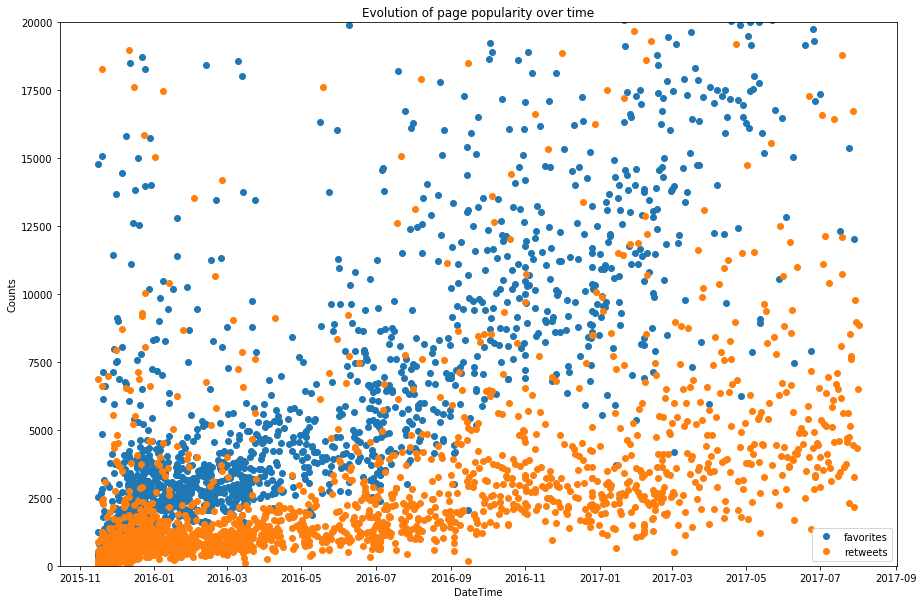

In [77]:
timestamp = pd.DataFrame(twitter_archive_master.timestamp)

#plotting
fig, ax = plt.subplots(figsize = (15,10))

ax.plot_date(timestamp,twitter_archive_master.favorites)
ax.plot_date(timestamp, twitter_archive_master.retweets)
ax.set_ylim([0, 20000])

#labels
ax.set_title('Evolution of page popularity over time')
ax.set_xlabel('DateTime')
ax.set_ylabel('Counts')
ax.legend()

We can see that over time the page has grown in popularity with more and more users favoriting and retweeting posts.

### Insight 3:  Most popular/common dog category (Visualization)

Text(0.5,0.98,'Dog Stages')

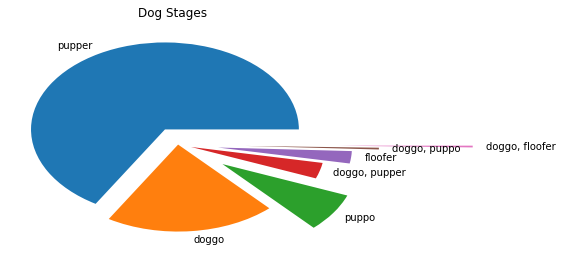

In [78]:
# pie chart of dog stage, excluding all 'none' values
dog_stage_count = list(twitter_archive_master[twitter_archive_master['dog_stage'] != 'None']['dog_stage'].value_counts())
dog_stages = twitter_archive_master[twitter_archive_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()

#plot pie chart
myexplode = [0.2, 0, 0.4,  0.1, 0.3, 0.5, 1.2]
plt.pie(dog_stage_count, labels = dog_stages, explode = myexplode)
plt.suptitle('Dog Stages')


From this lovely pie chart we can see the distribution of all the dog categories. The most popular one here is pupper.